In [3]:
!pip install numpy pandas scikit-learn matplotlib seaborn joblib

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 601.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.7 MB 601.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.7 MB 601.8 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 570.6 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/8.7 MB 627.7 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/8.7 MB 627.7 kB/s eta 0:00:13
   ------ --------------------------------- 1.3/8.7 MB 630.4 kB/s eta 0:00:12
   ------ ------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import important libraries for data handling, analysis, and visualization.
import numpy as np                      # For numerical operations
import pandas as pd                     # For handling datasets in table format
import matplotlib.pyplot as plt         # For creating graphs and plots
import seaborn as sns                   # For prettier statistical plots

# Import scikit-learn tools for PCA and ML
from sklearn.datasets import load_breast_cancer  # Loads the built-in cancer dataset
from sklearn.preprocessing import StandardScaler # For scaling data before PCA
from sklearn.decomposition import PCA             # For performing PCA
from sklearn.model_selection import train_test_split # For splitting into train/test sets
from sklearn.linear_model import LogisticRegression  # For classification (bonus part)
from sklearn.metrics import classification_report, roc_auc_score # For model evaluation

In [2]:
# Load the built-in breast cancer dataset from scikit-learn
data = load_breast_cancer()

# Create a DataFrame (table) from the features
X = pd.DataFrame(data.data, columns=data.feature_names)

# Create a Series (1D array) for the target labels (0 = malignant, 1 = benign)
y = pd.Series(data.target, name="target")

# Display the first 5 rows to understand what the data looks like
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [3]:
# Let's check the shape of the dataset and the target labels.
print("Number of rows and columns in X:", X.shape)  # Shape of feature dataset
print("Unique target labels:", data.target_names)   # What the target numbers mean
print("\nSample target values:", y.unique())        # Check the actual label numbers

# Check if there are missing values in the dataset
print("\nTotal missing values in the dataset:", X.isnull().sum().sum())

# Quick summary statistics for first few features
X.describe().T.head()

Number of rows and columns in X: (569, 30)
Unique target labels: ['malignant' 'benign']

Sample target values: [0 1]

Total missing values in the dataset: 0


count        mean         std        min        25%  \
mean radius      569.0   14.127292    3.524049    6.98100   11.70000   
mean texture     569.0   19.289649    4.301036    9.71000   16.17000   
mean perimeter   569.0   91.969033   24.298981   43.79000   75.17000   
mean area        569.0  654.889104  351.914129  143.50000  420.30000   
mean smoothness  569.0    0.096360    0.014064    0.05263    0.08637   

                       50%       75%        max  
mean radius       13.37000   15.7800    28.1100  
mean texture      18.84000   21.8000    39.2800  
mean perimeter    86.24000  104.1000   188.5000  
mean area        551.10000  782.7000  2501.0000  
mean smoothness    0.09587    0.1053     0.1634

In [4]:
# PCA works best when data is scaled so all features are on the same scale.
# StandardScaler standardizes data: mean = 0, standard deviation = 1.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Returns a NumPy array

# Check the shape of scaled data (should be same as X)
print("Shape of scaled dataset:", X_scaled.shape)

Shape of scaled dataset: (569, 30)


Cumulative variance explained by first 2 PCs: 63.24%


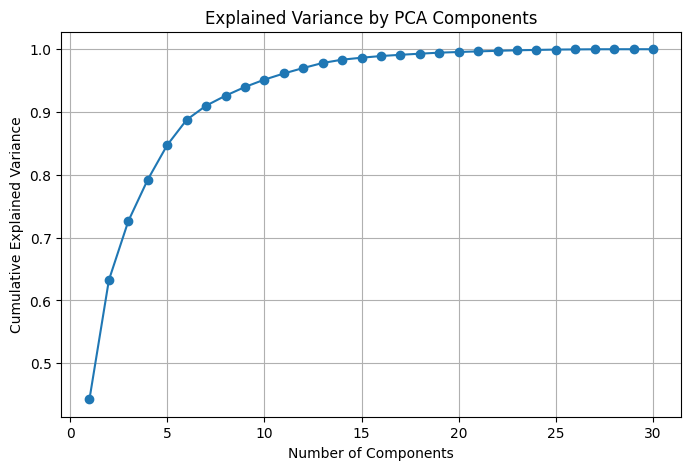

In [5]:
# Fit PCA without reducing components to see variance explained by each.
pca_all = PCA()
pca_all.fit(X_scaled)

# Explained variance ratio tells us how much variance each principal component covers
explained_variance_ratio = pca_all.explained_variance_ratio_

# Cumulative variance shows how much is explained as we add more components
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Cumulative variance explained by first 2 PCs: {:.2f}%"
      .format(cumulative_variance[1] * 100))

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [6]:
# Create a PCA model that reduces the dataset to 2 components
pca2 = PCA(n_components=2, random_state=42)

# Fit and transform the scaled data
X_pca2 = pca2.fit_transform(X_scaled)

print("Explained variance ratio for PC1 & PC2:", pca2.explained_variance_ratio_)
print("Shape of reduced dataset:", X_pca2.shape)

Explained variance ratio for PC1 & PC2: [0.44272026 0.18971182]
Shape of reduced dataset: (569, 2)


In [7]:
# Turn the PCA output into a DataFrame for easier plottin
df_pca = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])

# Add the target column (cancer type)
df_pca['target'] = y

# Show first few rows
df_pca.head()

PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

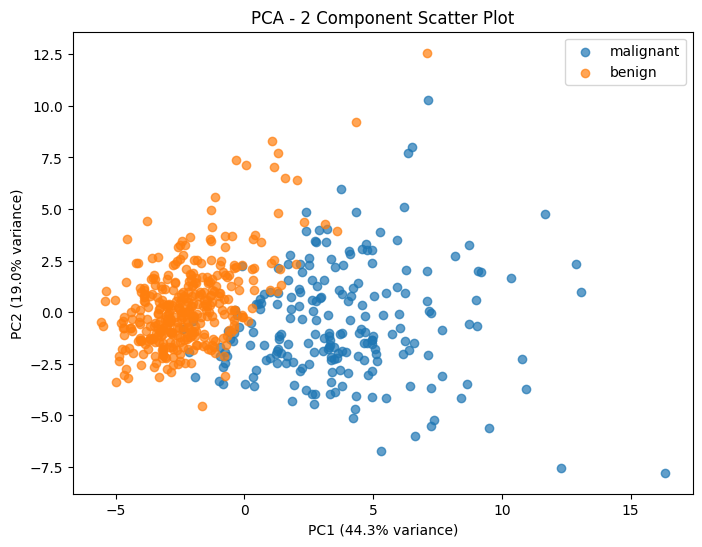

In [8]:
# Scatter plot of the two principal components
plt.figure(figsize=(8,6))

# Plot each target class with different color
for target_value, target_name in enumerate(data.target_names):
    mask = df_pca['target'] == target_value
    plt.scatter(df_pca.loc[mask, 'PC1'],
                df_pca.loc[mask, 'PC2'],
                label=target_name, alpha=0.7)

plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.title("PCA - 2 Component Scatter Plot")
plt.legend()
plt.show()

In [9]:
# PCA components tell us how original features combine into PCs.
# Each PC is a weighted sum of original features; these weights are called "loadings".

# Create a DataFrame of loadings so it's easy to read
loadings = pd.DataFrame(pca2.components_.T, index=X.columns, columns=['PC1', 'PC2'])

# Show the loadings (positive/negative values indicate direction of contribution)
loadings.head(10)

PC1       PC2
mean radius             0.218902 -0.233857
mean texture            0.103725 -0.059706
mean perimeter          0.227537 -0.215181
mean area               0.220995 -0.231077
mean smoothness         0.142590  0.186113
mean compactness        0.239285  0.151892
mean concavity          0.258400  0.060165
mean concave points     0.260854 -0.034768
mean symmetry           0.138167  0.190349
mean fractal dimension  0.064363  0.366575

In [10]:
# For interpretation, we often look at the absolute value of loadings
# to find which original features influence each PC the most.

# Top contributors for PC1
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(8)
print("Top 8 features that contribute to PC1 (by absolute loading):\n")
print(top_pc1)

# Top contributors for PC2
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(8)
print("\nTop 8 features that contribute to PC2 (by absolute loading):\n")
print(top_pc2)

# display the actual signed loadings for those features (so direction is visible)
print("\nSigned loadings for those top features (PC1):")
display(loadings.loc[top_pc1.index, 'PC1'])

print("\nSigned loadings for those top features (PC2):")
display(loadings.loc[top_pc2.index, 'PC2'])

Top 8 features that contribute to PC1 (by absolute loading):

mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
worst concavity         0.228768
worst radius            0.227997
mean perimeter          0.227537
Name: PC1, dtype: float64

Top 8 features that contribute to PC2 (by absolute loading):

mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
mean area                  0.231077
worst radius               0.219866
worst area                 0.219352
Name: PC2, dtype: float64

Signed loadings for those top features (PC1):


mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
worst concavity         0.228768
worst radius            0.227997
mean perimeter          0.227537
Name: PC1, dtype: float64


Signed loadings for those top features (PC2):


mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius               -0.233857
compactness error          0.232716
mean area                 -0.231077
worst radius              -0.219866
worst area                -0.219352
Name: PC2, dtype: float64

Classification report:

              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        42
      benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC AUC Score: 0.9887566137566137


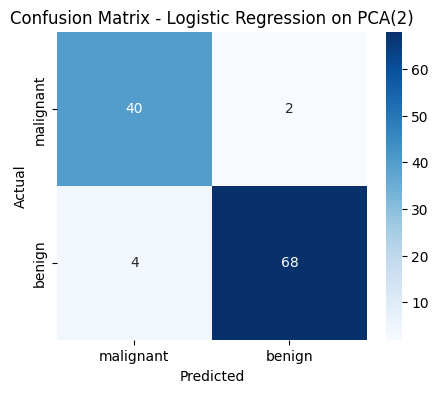

In [11]:
# We'll train a simple Logistic Regression classifier using the two PCA features.
# This shows how well the reduced representation separates classes.

# Prepare train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    df_pca[['PC1', 'PC2']], df_pca['target'], test_size=0.2, random_state=42, stratify=df_pca['target']
)

# Create, fit, and predict with logistic regression
clf = LogisticRegression(solver='liblinear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Print classification metrics
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# ROC AUC (useful for binary classification probability quality)
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression on PCA(2)")
plt.show()

In [12]:
# Summarize the key findings for report.
total_variance_2pcs = (pca2.explained_variance_ratio_.sum()) * 100

print("Summary:")
print(f"- Reduced from {X.shape[1]} features to 2 principal components.")
print(f"- The two components explain {total_variance_2pcs:.2f}% of the total variance.")
print("- Check 'outputs/pca_2components.csv' for the reduced data and 'models/' for saved models.")
print("- 'outputs/figures/pca_scatter.png' is the PCA scatter plot.")

Summary:
- Reduced from 30 features to 2 principal components.
- The two components explain 63.24% of the total variance.
- Check 'outputs/pca_2components.csv' for the reduced data and 'models/' for saved models.
- 'outputs/figures/pca_scatter.png' is the PCA scatter plot.
